# Null Hypothesis Significance Testing

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import samplers as spl

plt.style.use('ggplot')

/Users/matthewdrury/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


## Example: Fisher's Tea Experiment

[Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher)'s friend [Muriel Bristol](https://en.wikipedia.org/wiki/Muriel_Bristol) claims that she can tell, by actually drinking the beverage, whether milk was poured in first or second into a cup of tea.  I.e. tea into the milk, or milk into the tea.

Fisher, being an upstanding skeptic, is skeptical, so devises an experiment to test her claim.

**Discussion:** How could we determine whether Muriel is telling the truth.

Fisher's solution is as follows.  He preapares six cups of tea, three with tea first and three with milk first. These cups are then given to Muriel arranged in a random order.

**Note:** For simplicity, I'll assume in my version that Muriel does *not know* that there are three of each.

He has Muriel drink each beverage, and attempt to guess if tea or milk were poured first.  Her results are as follows

| Cup | Result    |
|----:|----------:|
| 1   | Correct   |
| 2   | Correct   |
| 3   | Correct   |
| 4   | Incorrect |
| 5   | Correct   |
| 6   | Correct   |

**Discussion:** How would you determine whether you believe Muriel or not?  What is the appropriate thing to measure, and how should we measure it?

Fisher, remember, is a skeptic.  He is predisposed to **not** believe Muriel.  So he makes the skeptical hypothesis:

> Fisher's Hypotheis: Muriel has *no* ability to tell milk into tea from tea into milk.  Therefore, each of her answers is completely random.

Fisher now asks himself an important question:

> Given that my hypothesis is correct, **how suprising is this data?**

**Discussion**: How should we answer Fisher's question?

Let's take Fisher's hypothesis seriously.  If he is correct, what should we expect the data we observe to look like?

Well, under this hypothesis, the chances of Muriel getting any sigle cup correctly is $0.5$.   That is, if Fisher is correct, the data we observed woudl be generated by a siimple sequence of coin flips.

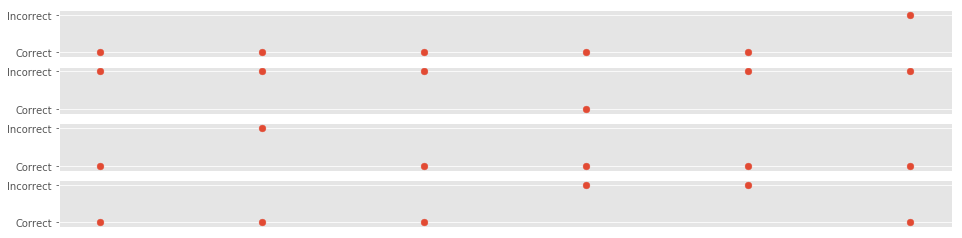

In [3]:
bernoulli = spl.Binomial(1, 0.5)

fig, axs = plt.subplots(4, 1, figsize=(16, 4))
for i, ax in enumerate(axs.flatten()):
    results = bernoulli.sample(6)
    ax.scatter(range(1, 7), results, s=45)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Correct", "Incorrect"])
    ax.set_xticks(())

Instead of considering the specific sequence of correct or incorrect answers, it seems more natural to consider the **number** of correct and incorrect answers.

**Question:** What is the distribution of the number of correct answers by Muriel under Fisher's hypothesis?

If Fisher is correct, and Muriels answers are totally random, then the distribution of the number of cups Muriel gets correct is a Binomial distribution

$$\text{# of cups guessed correctly} \sim Binomial(n=6, p=0.5)$$

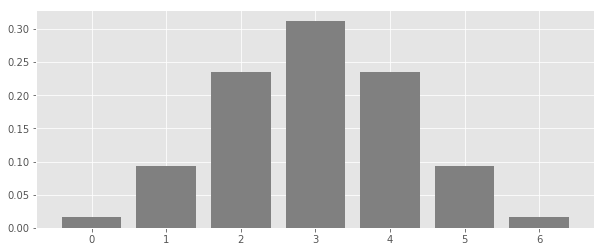

In [6]:
bernoulli = spl.Binomial(6, 0.5)

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.bar(range(7), [bernoulli.pdf(i) for i in range(7)], color="grey")

Muriel guessing all but one correctly seems like an extremely suprising event given this assumption.  We can charecterize our **degree of suprise in the data given our assumption** by calculating the following proability:

$$ P(\text{Observing this Data} \mid \text{Fisher's Assumption})$$

In our example, we can actually calculate this probability exactly from the binomial distribution.

$$ P(\text{Observing this Data} \mid \text{Fisher's Assumption}) = {{6}\choose{5}} 0.5^6 $$

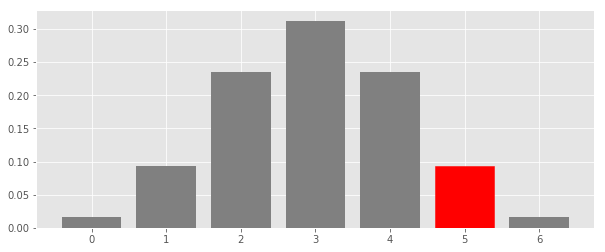

In [8]:
bernoulli = spl.Binomial(6, 0.5)

fig, ax = plt.subplots(1, figsize=(10, 4))
bars = ax.bar(range(7), [bernoulli.pdf(i) for i in range(7)], align="center", color="grey")
bars[5].set_color('red')

Fisher observed that, in fact, he would have been suprized if he had observed this data **or any data even more extreme than this**, so a more corrct measure of suprise would be

$$ P(\text{Observing Data As Or More Extreme} \mid \text{Fisher's Assumption}) = {{6}\choose{5}} 0.5^6 +{{6}\choose{6}} 0.5^6  $$

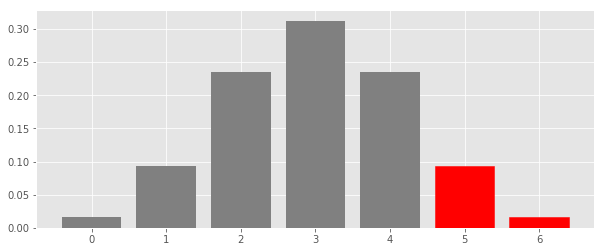

In [9]:
bernoulli = spl.Binomial(6, 0.5)

fig, ax = plt.subplots(1, figsize=(10, 4))
bars = ax.bar(range(7), [bernoulli.pdf(i) for i in range(7)], align="center", color="grey")
bars[5].set_color('red')
bars[6].set_color('red')

We can calcualte this number easily in python.

In [12]:
binomial = spl.Binomial(6, 0.5)

prob_equal_or_more_extreme = 1 - binomial.cdf(4)
print("Probability of Obsrving Data More Equal or More Extreme than Actual: {:2.2}".format(
    prob_equal_or_more_extreme))

Probability of Obsrving Data More Equal or More Extreme than Actual: 0.11


We now have a different sort of problem, how do we *interpret* this level of suprise?  Are we suprised of not?

**Discussion:** Are we suprised?  Is your answer to this question affected by looking at the number?

## Hypothesis Testing: The Big Picture

The tea example was reported in Fisher's classic text *The Design of Experiments*, and it is a prototypical example of the logic behind Hypothesis testing.





#### State a Scientific Question.

State a scientific question (a yes/no question) of interest that can be answered with data that you have collected or intend to collect.

In Fisher's tea experiment the scientific question is 

> Can Muriel identify milk into tea from tea into milk?

#### Take a Skeptical Stance, and Clearly State This Hypothesis.

The skeptics stance is called the **Null Hypothesis**.

In Fisher's experiment, the Null Hypothesis is 

> Muriel cannot tell the difference, and hence is guessing at random.

#### State the Opposite of Your Skeptical Hypothesis.

The opposite of the Null Hypothesis is called the **Alternate Hypothesis**.  It **must** be the exact opposite of the Null, so that the Null and the Alternate cover *all* possibilities.

Our alternative hypothesis in the Tea case is:

> Muriel is not guessing randomly.

**Note:** This covers two cases!  On one hand, Muriel *could* be better than chance, but Muriel could also be worse!

#### Create a Probablistic Model of the Stiuation Assuming the Null Hypothesis is True

The Null Hypothesis generally states that some process is governed by only chance, so conceptualize exactly how the data is being generated probabalistically.

In Fisher's example, our probabalistic model is

$$\text{# of cups guessed correctly} \mid \text{Muriel is guessing randomly}\sim Binomial(n=6, p=0.5)$$

#### Decide how Suprised You Need to Be to Reject Your Skeptical Assumption

Before looking at any data, set a threashold for you skepticism, which is traditionally labeled $\alpha$.  This threshold can be based on many considerations.

We neglected to do this in our tea example.

**Note:** It is a common pracitice to set a threshold of $\alpha = 0.05$ with no thought of reflection.  This is a source of much consternation in statistical circles, and you should not do so without reflection.

#### Collect Your Data.

![Big Data](bigdata.jpg)

#### Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Probabilistic Model You Created.

This calculated conditional probability is called the **p-value**.

In Fisher's example, the calculated p-value is:

$$ P(\text{Observing Data As Or More Extreme} \mid \text{Null Hypothesis}) = {{6}\choose{5}} 0.5^6 + {{6}\choose{6}} 0.5^6  $$

#### Compare the p-value to Your Stated Rejection Threashold.

If the p-value is smaller than your rejection threashold, you must reject your Null Hypothesis as **inconsistent with the data you collected**.

That is, you have demonstrated, to your stated tolerance, that your skeptical stance is unlikely to be true.

A useful way to think of this is:

  - **Skptical Stance**: I will act as if my skeptics stance is true.
  - **Alternate Stance**: I will act as if my skeptics stance is not true.
  
In the case that your computed p-value is smaller than your stated threashold, you must act as if the skeptic's hyptothesis is **not true** (though, of course, it may very well be and you just got unlucky).

#### Publish Your Data and Code Online With Explicit Instructions for Replicating Your Result.

: )

### Comments

If you happen to *not* find sufficient evidence to reject your null hypothesis, **you have not proven that your null hypothesis is true**.

Indeed, the entire procedure was predicated on *assuming* the null was true *until sufficient evidence is found to make this stance untenable*.  If you do not reject the null, you simply continue to hold this skeptic's stance until more evidence comes along and you need to re-evaluate.

## Examples Of Common Hypothesis Tests

### One Sample Exact Test of Population Proportion

#### Setup

Matt is all about cosistency in skateboarding, and is learning to Kickflip.  He does not want to move onto another trick until he can cleanly land a Kickflip $80\%$ of the time.

Being a scientist, he is skeptical of himself, and assumes the following hypothesis until he can prove otherwise:

> Null Hypothesis: $P(\text{I Land a Kickflip}) < 0.8$

On a particularly uneventful saturday, Matt keeps track of $100$ kickflip attempts (after properly warming up and stretching of course, Matt is 34).  He does quite well, and lands $84$ of them.

**Question:** Should Matt move on to another trick?

#### Create a Probablistic Model of the Stiuation Assuming the Null Hypothesis is True

We would like to create a probabilstic model of my Kickflip ability under the null hypothesis that

> Null Hypothesis: $P(\text{I Land a Kickflip}) < 0.8$

But this is kind of hard, because I don't have a single probability to rely on.  But consider my intent, to **be as skeptical as possible**.  If I base my model on, say, a probability of $0.5$, then it is **easier to collect data that is inconsistent with this probability**.  So, given my setup, I should use the probability that allows me to be **most skeptical**.  

If I asssume that:

> Null Hypothesis': $P(\text{I Land a Kickflip}) = 0.8$

This allows me to be **maximally skeptical**.  It is **most difficult** to reject the null if I use a probability of $0.8$.

What I really want now is to know the probability I land $k$ out of $100$ kickflips.  To get there, I need to make one additional assumption: that each kickflip is independent of the rest.  This allows me to come up with a full probabilistic model under the Null:

$$ \text{# of kickflips landed} \mid \text{Null Hypothesis} \sim Binomial(n=100, p=0.8) $$

Text(0.5,1,'# of Kickflips Landed Under The Null Hypothesis')

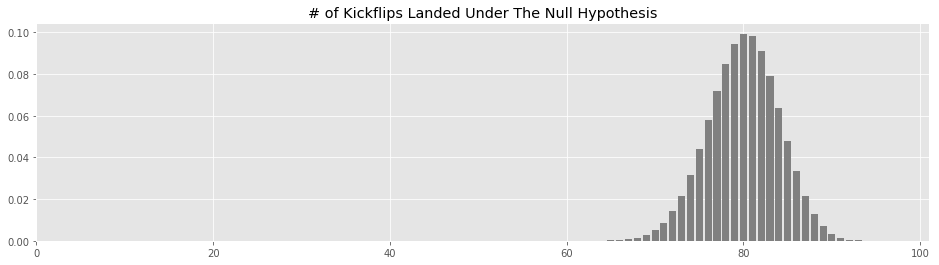

In [14]:
binomial = spl.Binomial(100, 0.8)

fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(101), [binomial.pdf(i) for i in range(101)], align="center", color="grey")
ax.set_xlim(0, 101)
ax.set_title("# of Kickflips Landed Under The Null Hypothesis")

#### Decide how Suprised You Need to Be to Reject Your Skeptical Assumption

Rejecting the null hypothesis here incorrectly is not particularly harmful, as it just means I get to start working on another trick without being super confident in my kickflips.  So I'll set my rejection threshold rather high, let's take 

$$ \alpha = 0.2 $$

#### Collect Your Data.

![Kickflip](kickflip.jpg)

Matt landed 84 of 100 kickflips.

#### Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Probabilistic Model You Created.

This is almost the same calculation as the tea example.

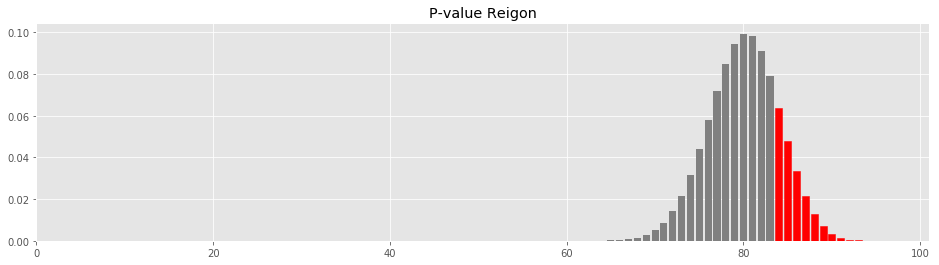

In [19]:
fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(101), [binomial.pdf(i) for i in range(101)], color="grey", align="center")
ax.set_xlim(0, 101)

for i in range(84, 101):
    bars[i].set_color('red')
    
_ = ax.set_title("P-value Reigon")

In [20]:
prob_equal_or_more_extreme = 1 - binomial.cdf(84)
print("Probability of Obsrving Data More Equal or More Extreme than Actual: {:2.2}".format(
    prob_equal_or_more_extreme))

Probability of Obsrving Data More Equal or More Extreme than Actual: 0.13


#### Compare the p-value to Your Stated Rejection Threashold.

We decided to reject at a threshold of $\alpha = 0.2$.  Since our p-value is less than this threshold, I can now work on some new tricks!

**Exercise**: Redo the example with a sample size of 250 kickflips, whith 210 of them landed (this is the same *proportion* of lands).  How does the p-value change?

### One Sample Approximate Test of Population Proportion

#### Setup

Suppose in the previous example I want to test my hypothesis more rigorously.  Instead of skating for a day, I spend an entire month collecting data.

**Let's say** I attempt 100 kickflips a day, for a total of 3100 kickflips, and I land 2531 of them.

In this case, our $N$ is quite large, so it's possible that we have a computer that cannot handle the exact calculations for the binomial distribution (we don't).

Luckily the central limit theorem tells us that a binomial with large $N$ is well approximated by a Normal distribution with the appropriate mean and varaince.

$$ Binomial(3100, 0.8) \approx N(3100*0.8, \sqrt{3100*0.8*0.2}) $$

**Question:** How did I compute the mean and varince of this normal distribution?

Text(0.5,1,'# of Kickflips Landed Under The Null Hypothesis')

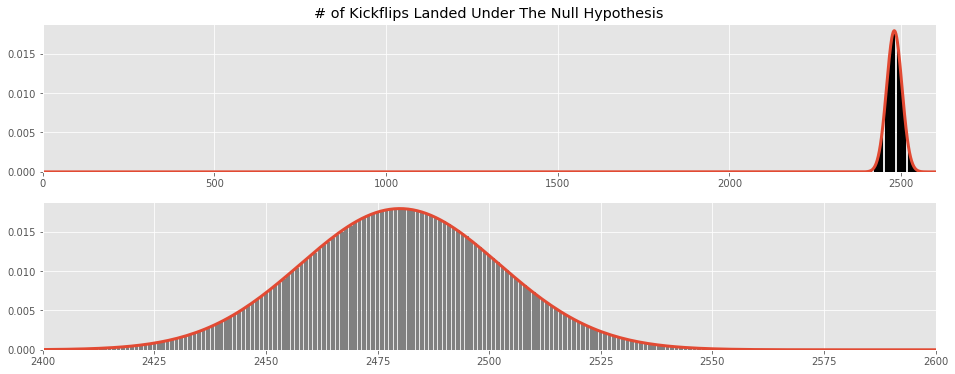

In [47]:
binomial = spl.Binomial(3100, 0.80)
binomial_mean = 0.8 * 3100
binomial_var = 3100 * 0.8 * 0.2
normal_approx = spl.Normal(binomial_mean, np.sqrt(binomial_var))
x = np.linspace(0, 3100, num=3000)

fig, axs = plt.subplots(2, figsize=(16, 6))
bar_sizes = [binomial.pdf(i) for i in range(3101)]
bars = axs[0].bar(range(3101), bar_sizes, color="black", align="center")
axs[0].plot(x, normal_approx.pdf(x), linewidth=3)
axs[0].set_xlim(0, 2600)

bars = axs[1].bar(range(3101), bar_sizes, color="grey", align="center")
axs[1].plot(x, normal_approx.pdf(x), linewidth=3)
axs[1].set_xlim(2400, 2600)

axs[0].set_title("# of Kickflips Landed Under The Null Hypothesis")

The approximation here is very good, so we can replace the exact Binomail distribution with the approximate Normal distribution.

```python
binomial_mean = 0.8 * 3100
binomial_var = 3100 * 0.8 * 0.2
normal_approx = spl.Normal(binomial_mean, np.sqrt(binomial_var))
```

The p-value for this one month experiment is

$$ P(\geq \text{ 2531 Kickflips Landed} \mid \text{Null Hypothesis} ) $$

In [48]:
p_value = 1 - normal_approx.cdf(2530)
print("p-value for one month kickflip experiment: {:2.2f}".format(p_value))

p-value for one month kickflip experiment: 0.01


Text(0.5,1,'p-value Reigon')

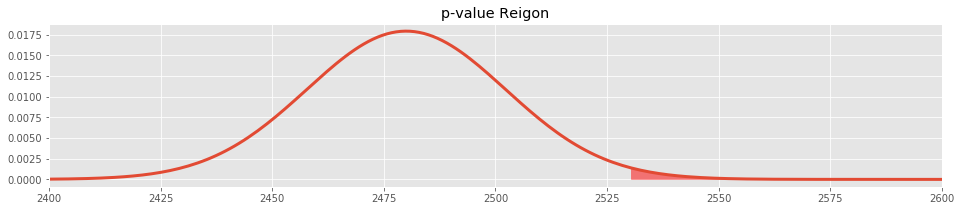

In [50]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, normal_approx.pdf(x), linewidth=3)
ax.set_xlim(2400, 2600)
ax.fill_between(x, normal_approx.pdf(x), 
                where=(x >= 2530), color="red", alpha=0.5)
ax.set_title("p-value Reigon")

The month of practice has made me much more confident in my skill, I should definately move on to another trick.

The approximate test for a population proportion (the "approximate" because the Binomial distribution is approximated with a Normal) is often called the **z test for a population proportion** because the tables of tail probabilities of normal distributions that poeople would use to look up tail probablities from the normal distribution back in the day were called "z-tables".

It's an amusing fact that crappy undergrad statistics textbooks still print the mandataory z-tables on thier back covers.  In 2017.

**Exercise**: Matt has worked at galvanize 312 days, and rides the bus two ways each day.  He is thinking of buying a car, as observed that a bus is late often, 340 times to be exact.  He would like to purchase the car if the bus is *truly* late more than half the time.  Set up a z-test to decide if Matt should purchase the car.

### Two Sample Approximate Test of Population Proportions

The math in this example is a little more involved, and the Normal approximation here is much more essential than in the previous example.

#### Setup

Now that Matt is confident in his kickflips, he wants to prove that he is better at them than his friend Nick, at least in terms of consistency.

On a day of skating together, Matt attempts 80 kickflips, landing 58, before hurting his ankle.  Nick finishes the full 100, and lands 65.

#### Take a Skeptical Stance, and Clearly State This Hypothesis.

The skptical stance would be that Matt is *not* better than Nick at kickflips, he is at best, equally good.  More precisely, our null hypothesis is that the frequency Matt lands kickflips is *at most* the frequency that Nick lands kickflips.

$$ p_M = P(\text{Matt lands a kickflip}) $$
$$ p_N = P(\text{Nick lands a kickflip}) $$

$$ H_0: \ p_M \leq p_N $$

#### Create a Probablistic Model of the Stiuation Assuming the Null Hypothesis is True

Assuming that each kcikflip Matt tries is independent of all the rest (with the same for Nick), the number of kickflips Matt and Nick land in a fixed number of attempts are Binomial distributed

$$ \text{# of kickflips Matt lands} \sim Binomial(80, p_M) $$
$$ \text{# of kickflips Nick lands} \sim Binomial(100, p_N) $$

The numbers here as smaller than before, but a Normal approximation is still appropriate for each of these Binomail distributions

$$ \text{# of kickflips Matt lands} \approx Normal(80p_M, \sqrt{80p_M(1-p_M)}) $$
$$ \text{# of kickflips Nick lands} \approx Normal(100p_N, \sqrt{100p_N(1-p_N)}) $$

Now let's do something clever, let's instead consider the **frequency** that matt an Nick land kickflips, instead of the actual number they landed.  This puts Matt and Nick on equal footing, neccessary since the attempted different numbers of kickflips

$$ \text{Frequency Matt lands kickflips in a sample} \approx Normal \left( p_M, \sqrt{\frac{p_M(1-p_M)}{80}} \right) $$
$$ \text{Frequency Nick lands kickflips in a sample} \approx Normal \left( p_N, \sqrt{\frac{p_N(1-p_N)}{100}} \right) $$

Finally, assuming that Matt landing a kickflip is independent of Nick landing a kickflip, we get a probablistic model for the **difference in sample frequecies**

$$ \text{Difference in sample frequencies between Matt and Nick} \approx Normal \left( p_M - p_N, \sqrt{\frac{p_N(1-p_N)}{100} + \frac{p_M(1-p_M)}{80}} \right) $$

**Question:** How did I calculate the mean and varaince of this final Normal distribution.

Our null hypothesis is

$$ H_0: \ p_M \leq p_N $$
    
In the same way as before, I want to make this hypothesis maximally difficult to reject, but also have specific probabilities to work with (rather than a range).  The most conservative hypothesis is

$$ H_0: \ p_M = p_N \equiv p$$

Which makes our probabalistic model under the null reduce to

$$ \text{Difference in sample frequencies between Matt and Nick} \approx Normal \left( 0, \sqrt{\frac{p(1-p)}{100} + \frac{p(1-p)}{80}} \right) $$

The last problem is that we **don't know the true frequencies $p_M$ and $p_N$, nor the assumend shared fequency p**, (if we did, we wouldnt need the statistical test).  Our only resort is to substitute an estimate of the shared value from the sample

$$ \text{Difference in sample frequencies between Matt and Nick} \approx Normal \left( 0, \sqrt{\frac{180 \hat p(1- \hat p)}{800}} \right) $$

In [27]:
shared_sample_freq = (58.0 + 65.0) / 180
shared_sample_variance = 180 * (shared_sample_freq * (1 - shared_sample_freq)) / 800

difference_in_proportions = spl.Normal(0, np.sqrt(shared_sample_variance))

Text(0.5,1,'Distribution of Difference in Sample Frequencies Assuming $H_0$')

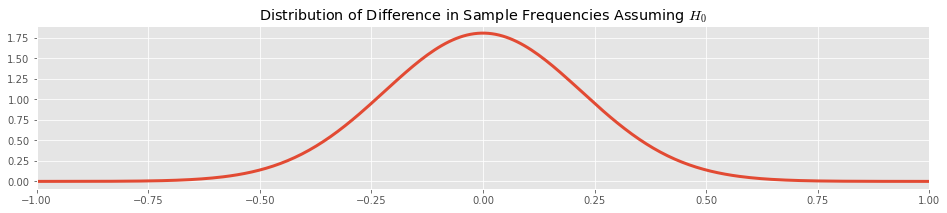

In [51]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

#### Decide how Suprised You Need to Be to Reject Your Skeptical Assumption

Tricky in this situation, depends on what Matt wants to do with the information.  

Matt wants to be a jerk, and rub it in his friends face, but to do so, he better be really sure.  So let's set the rejection threashold pretty stringently: $\alpha = 0.02$.

#### Collect Your Data

![Two People Kickflips](two-kickflips.jpg)

#### Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Probabilistic Model You Created.

The difference in proportions in the observed sample is

In [30]:
matt_sample_freq = 58.0 / 80
nick_sample_freq = 65.0 / 100
difference_in_sample_proportions = matt_sample_freq - nick_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

Difference in sample proportions: 0.07


So the p-value for our experiment is

$$ P(\text{Difference in proportions equal to or more extreme than observed} \mid \text{Null hypothesis}) $$

In [31]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for kickfip frequency comparison: {:2.2f}".format(p_value))

p-value for kickfip frequency comparison: 0.37


Text(0.5,1,'p-value Reigon')

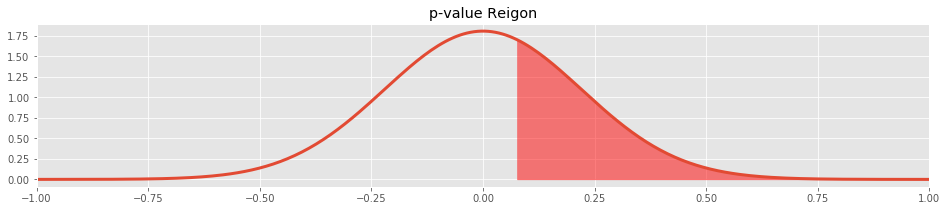

In [52]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("p-value Reigon")

#### Compare the p-value to Your Stated Rejection Threashold.

We're no where near confident enough in our superior ability to brag, so let's back off that for the moment.

The two sample approximate test for population proportions is sometimes called the **two sample z-test**, for similar reasons as before.

**Exercise:** Matt and his friend Mike like to do integral competitions, they get out their calculus textbook, pick a random integral, then race to compute it.  Of course, the win only counts if they get the answer *correct*, which they can check with an online solver.  After 100 integrals, Matt was correct 70% of the time, and Mike was correct 77% of the time.  Is is safe to say that Mike is better at intergration than Matt?

### Appendix: Two Sample Approximate Test of Population Means (Welsh's t-test)

Next, Matt and Nick want to see who can kickflip **higher**.  They set up a measuring tape, and each carefully measure the heights of 25 of thier kickflips (in feet).

In [63]:
matt_heights = [1.5, 0.9, 0.9, 1.3, 2.1, 1.9, 1.6, 1.4, 2.3, 1.0, 1.5, 0.9, 2.1,
                1.3, 1.4, 2.1, 1.2, 1.7, 1.7, 2.0, 1.6, 1.2, 1.6, 1.7, 1.5]
nick_heights = [1.9, 1.8, 1.3, 2.3, 1.7, 1.9, 2.7, 2.1, 2.2, 1.5, 1.8, 2.0, 1.1,
                1.7, 2.1, 1.5, 2.3, 1.5, 2.0, 2.4, 1.5, 1.4, 1.6, 1.8, 1.0]

[Text(0,0,'Matt'), Text(0,0,'Nick')]

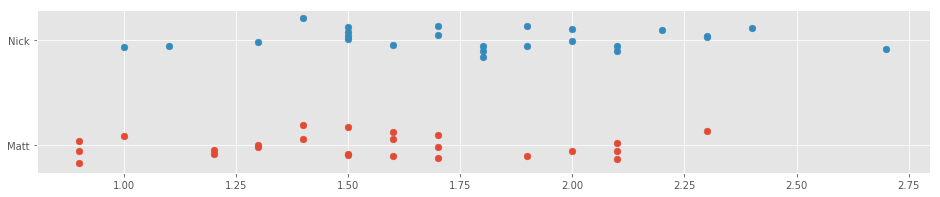

In [64]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(matt_heights, np.repeat(0, len(matt_heights)) + np.random.normal(0, 0.1, len(matt_heights)), s=45)
ax.scatter(nick_heights, np.repeat(1, len(nick_heights)) + np.random.normal(0, 0.1, len(matt_heights)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Matt", "Nick"])

The data looks like Nick can consistently kickflip higher than Matt, but let's construct a formal test of this.

#### Take a Skeptical Stance, and Clearly State This Hypothesis.

Skepticism here is a bit hard to interpret.  A good baseline assumption seems to be 

> there is no difference in how high Nick and Matt can kickflip.

Now there is clearly random variation in each **individual**  kickflip, so a more precise baseline assumption would be

> there is no difference in the average heights of kickflips performed by Nick and Matt.

#### Create a Probablistic Model of the Stiuation Assuming the Null Hypothesis is True

Our question concerns population averages (is Matt's population average different than Nick's).  Our measurements are **sample averages**, which, from the central limit theorem, we know are approximately normally distributed given the population average

$$ \text{Sample average of Matt's kickflips} \sim Normal \left( \mu_M, \sqrt{\frac{\sigma^2_M}{25}} \right) $$
$$ \text{Sample average of Nick's kickflips} \sim Normal \left( \mu_N, \sqrt{\frac{\sigma^2_N}{25}} \right) $$

Again, if we are willing to assume that the hight of Matt's individual kickflips are independent from Nick's, then we can compress the importnat information into one normal distribution

$$ \text{Difference in sample averages} \sim Normal \left( \mu_M - \mu_N, \sqrt{\frac{\sigma^2_M}{25} + \frac{\sigma^2_N}{25}} \right) $$

Under the assumption of the null hypothesis

$$ \text{Difference in sample averages} \sim Normal \left( 0, \sqrt{\frac{\sigma^2_M}{25} + \frac{\sigma^2_N}{25}} \right) $$

We're in a similar situation to last time, we do not know the population variances.

In the prior problem, our assumptions allowed us to compute the relevent varaince from the shared population frequency (which we estimated with the sample frequency).  There are two differences here

  - There are two independent varainces, which we have no reason to believe are the same.
  - The varainces are independed parameters, unrelated to the mean.
  
In cases where we have to independently estiamte the varaince of a normal distribution from the same samples we are testing, this estimation of the variance contributes to uncertenty in our test.  This means that the Normal distribution is then **too precise** to use as a conservative estimate of the p-value.

### Welch's t-test

To recify the problem, we first convert to a sample statistic whose varaince is expected to be $1$

$$ \frac{\text{Difference in sample averages}}{\sqrt{\frac{\sigma^2_M}{25} + \frac{\sigma^2_N}{25}}} $$

Now we still have a similar issue to the two sample test of population proportions, we do not know the population varainces in the denominator of the forula, so our only recourse is to substitute in the sample variances

$$ T = \frac{\text{Difference in sample averages}}{\sqrt{\frac{\hat \sigma^2_M}{25} + \frac{\hat \sigma^2_N}{25}}} $$

In [65]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [66]:
test_statistic = welch_test_statistic(matt_heights, nick_heights)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -2.38


Unfortuantely, this changes the distribution of the test statistic.  Instead of using a normal distribution, we must not use a **Student's t-distribution**, which accounts for the extra uncertenty in estimating the two new parameters.


The t-distribution always has mean $0$ and varaince $1$, and has one parameter, the **degrees of freedom**.  Smaller degrees of freedom have heavyer tails, with the distribution beoming more normal as the degrees of freedom gets larger.

Text(0.5,1,"Student's t-distributions")

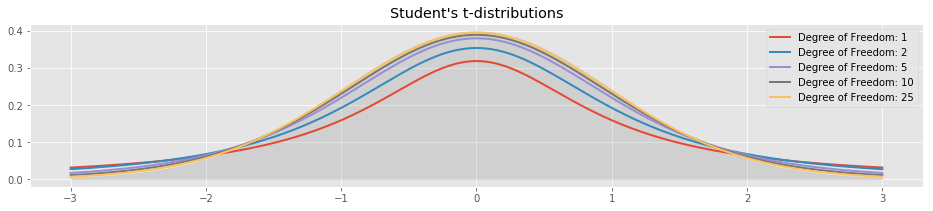

In [67]:
dfs = [1, 2, 5, 10, 25]
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))

normal = spl.Normal(0, 1)
ax.fill_between(x, normal.pdf(x), color="grey", alpha=0.2)
for df in dfs:
    students = spl.Students(df)
    ax.plot(x, students.pdf(x), linewidth=2,
            label="Degree of Freedom: {}".format(df))
ax.legend()
ax.set_title("Student's t-distributions")

**Welch's t-test** says that in this situation, the distribution of T is well approximated with a Student's distribution with an appropriate degree of freedom.  The degrees of freedom calculation is complex, enough that it has a name, the [Welch–Satterthwaite equation](https://en.wikipedia.org/wiki/Muriel_Bristol).  The resulting application to our situation results in [Welch's t-test](https://en.wikipedia.org/wiki/Welch's_t-test).

In [68]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [69]:
df = welch_satterhwaithe_df(nick_heights, matt_heights)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 47.97


Text(0.5,1,"Distribution of Welsh's Test Statistic Under the Null Hypothesis")

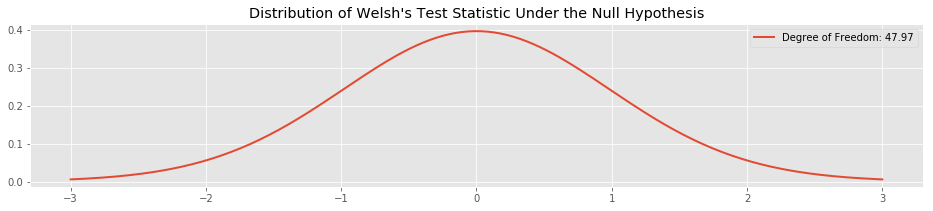

In [70]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = spl.Students(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

#### WARNING:

**Also, the above is not always true!**  The $T$ statistic only has a t-distribution **under the assumption that the population distributions are Normal**!  We did *not* have to assume this for *any* other test, but when we need to estimate the variance of the population, we need more structure!

If the population is very non-normal, the properties of the t-test **will fail**.  You must have some legitimate a-priori reason to believe the populations are approximately normal to use a t-test!

For this reason, many statisticians advise **AGAINST** t-tests these days, preferring non-parametric tests like the signed rank test.

#### Decide how Suprised You Need to Be to Reject Your Skeptical Assumption

Given the bragging rights at stake here, and how much they value to friendship, Matt and Nick decide to be reasonably skeptical, so take $\alpha = 0.05$.

#### Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Probabilistic Model You Created.

An interesting wrinkle here.  We have no prior assumption about whether Nick is better than Matt, or Matt is better than Nick, so a difference could go in either direction.

Text(0.5,1,'p-value Reigon')

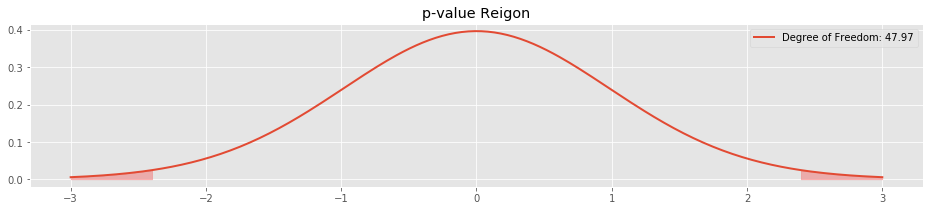

In [71]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = spl.Students(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")

In [72]:
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different average kickflip height: {:2.2f}".format(p_value))

p-value for different average kickflip height: 0.02


So we have enough evidence to conclude that **one of Nick or Matt is better**.

Look's like in this case we should be able to conclude that Nick is better, let's test that.

In [73]:
test_statistic = welch_test_statistic(nick_heights, matt_heights)

p_value = 1 - students.cdf(test_statistic)
print("p-value for Nick average kickflip height greater than Matt: {:2.2f}".format(p_value))

p-value for Nick average kickflip height greater than Matt: 0.01


So Nick is clearly better.

## Mathematical Properties of Hypothesis Tests

The logic of hypothesis testing can seem awkward and silly when first encountered, and the great number of individual hypothesis tests you need to learn to "speak the language" can be overwhelming.  Hopefully our examples have made the idea clear and intuitive.

Let's now turn to some higher level properties of hypothesis tests.

### The Distribution of p-values Under the Null Hypothesis

Fisher gave the first definition of **p-value**, his original intention was only to devise some measure of **strength of evidence** for a scientific hypothesis.

The idea of a *rejection threashold* came later, from Neyman–Pearson.  There idea was to **control the rate of false scientific discoveries**.

To explain this, we need to study the distribution of p-values under the null hypothesis.

Suppose we are studying a question, and the null hypothesis is **actually true**.  We collect some data, and compute the p-value of this data under the null hypothesis.  The question we want to address is **how do the computed p-values behave probabalistically?**

That is, drawing a different sample will result in a different p-value, how are these p-values distributed with respect to different samples?

**Discussion:** Let's brainstorm.  Assuming the Null Hypothesis is **actually true** in some situations, what should be the distribution of p-values we observe?

The best way to do this is to construct a simulation, let's write a function that runs a (one-tailed) one sample z-test on data sampled from the null hypothesis distribution, and returns the p-value of the sampled data.

In [79]:
def simulate_one_sample_z_test(n_simulations, sample_size=100, mu=0.0, sigma=1.0):
    normal = spl.Normal(mu, sigma)
    sampling_distribution = spl.Normal(mu, sigma / np.sqrt(sample_size))
    p_values = []
    for _ in range(n_simulations):
        sample = normal.sample(sample_size)
        sample_mean = np.mean(sample)
        sample_variance = np.var(sample)
        p_value = 1 - sampling_distribution.cdf(sample_mean)
        p_values.append(p_value)
    return p_values

Now let's run many simulations, and draw a histogram of the p-values

Text(0.5,1,'Distribution of p-values Under the Null Hypothesis')

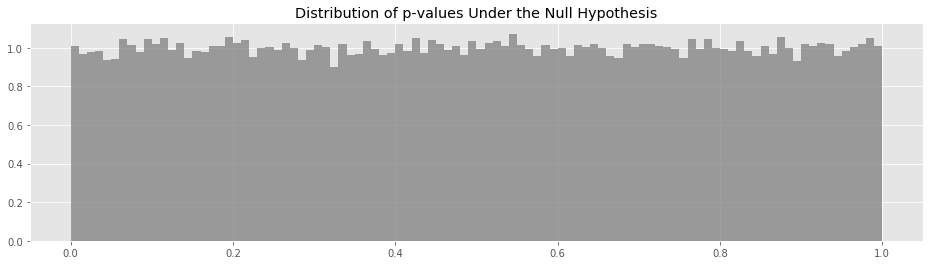

In [80]:
p_values = simulate_one_sample_z_test(10**5)

fig, ax = plt.subplots(1, figsize=(16, 4))
_ = ax.hist(p_values, bins=100, alpha=0.75, normed=True, color="grey")
ax.set_title("Distribution of p-values Under the Null Hypothesis")

**The p-values from a properly done hypothesis test, in the situation that the null hypothesis is true, are uniformly distributed between 0 and 1**.

### Controling the False Positive Rate

The fact above gives some insight into the idea behind the rejection threshold $\alpha$.

Recall that we set a rejection threshold *before* running the eperiment, and it is related to the weight of evidence we require before rejecting the null hypothesis.  I.e., we reject the null hypothesis when our computed p-value is less than our rejection threshold.

In the situation where the **null hypothesis is actually true**, setting a rejection threshold of, say, $0.05$ ensures that we will **only falsely reject the null hypothesis 5% of the time**.  Falsely rejecting the null hypothesis is called a **false positive**, or a **type one error**.

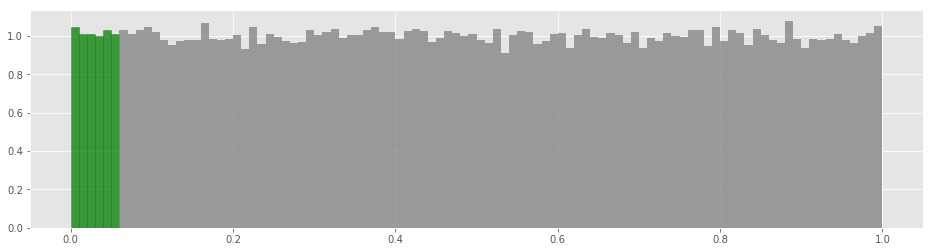

In [32]:
fig, ax = plt.subplots(1, figsize=(16, 4))
_, _, patches = ax.hist(p_values, bins=100, alpha=0.75, normed=True, color="grey")
for i in range(6):
    patches[i].set_color("green")

The green bars are the tests in our simulation that falsely reject the null hypothesis.

#### The Repeated Experiment Philosophy

> If we repeatedly and properly do a hypothesis test with rejection threshold $\alpha$ in a situation where our research hypothesis is **false**, then we will only **flasely conclude that it is true** at a rate of $\alpha$. 

Although the repeated experiment philosophy is often stated as the basis for hypothesis testing, it is actually **not** how hypothesis testing is used.  A more accurate philosophy is the

#### Worst Case Long Term False Positive Rate

> In the worst case situation that **all of our scientific hypthesis are false**, scientists using a rejection threshold of $\alpha$ for thier experiments will have, in the long term, a false positive rate of $\alpha$.

**Discussion:** Why is the second interpretation much more reasonable than the first?

**Note:** Failing to reject the null hypothesis when the scientific hypothesis is **true** is called a **false negative** or a **type two error**.

Studying the type two error rate takes some new concepts (mainly statistical power), which will be the subject of tomrrow's lesson.

### Multiple Testing: The Problem

Consider the case that I would like to test **all three** of the hypothesis in my skateboarding examples at a rejection threshold of $0.05$.

  - Matt lands kickflips at a rate greater that $0.8$.
  - Matt lands kickflips at a greater rate than Nick.
  - Matt kickflips higher than Nick.
  
Suppose that 

  - All my hypothesies are, in reality, false. 
  - I view my combined test as a failure if I falsely reject **any** of the null hypothesis.
  
Then preforming three seperate hypotheis tests at a rejection threshold of $0.05$ is **incorrect**.  Such a procedure will always reject **at least one** of the three hypothesies at a much higher rate than I intend.

**Question:** If I preform three seperate tests at a threshold of $0.05$, what is the true rate at which I reject **at least one** of these hypothesies (i.e., find at least one false positive).

The calculation here is a standard probabalistic arguemnt.

  - The rate I falsely reject a single hypothesis is $\alpha$.
  - The rate I do **not** falsely reject a single hypothesis is $1 - \alpha$.
  - The rate I do **not** falsely reject **each and every one** of the hypothesies is $(1 - \alpha)^3$.
  - The rate I **do** falsely reject **at least one** of the hypothesies is $1 - (1 - \alpha)^3$.

In [33]:
combined_false_positive_rate = 1 - (1 - 0.05)**3

print("True combined false positive rate: {:2.2f}".format(combined_false_positive_rate))

True combined false positive rate: 0.14


Let's look at this another way.  Suppose that the three p-values we get are $p_1, p_2$ and $p_3$.  Then we falsely reject the combined hypothesis whenever at least one of the p-values is less than $0.05$

$$ min(p_1, p_2, p_3) < 0.05 $$

To keep the false positive rate under control, we would need this to happen only $5\%$ of the time.

We can re-do our simulation and see how often a composite of three hypothesies is falsely rejected:

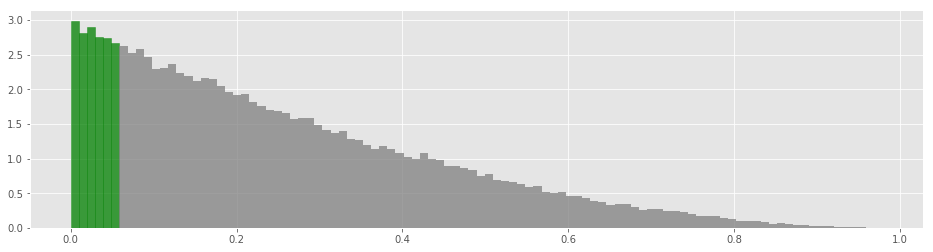

In [34]:
p_values = simulate_one_sample_z_test(3*10**5)
p_values_combined = np.array([min(x, y, z) for x, y, z in zip(p_values[::3], p_values[1::3], p_values[2::3])])

fig, ax = plt.subplots(1, figsize=(16, 4))
_, _, patches = ax.hist(p_values_combined, bins=100, alpha=0.75, normed=True, color="grey")
for i in range(6):
    patches[i].set_color("green")

In [35]:
combined_false_positive_rate = np.sum(p_values_combined <= 0.05) / float(len(p_values_combined))
print("Combined False Positive Rate: {:2.2f}".format(combined_false_positive_rate))

Combined False Positive Rate: 0.14


Clearly, we are falsely rejecting much more than we should be.

### Bonferroni Correction

The **Bonferroni Correction** is a popular way to rectify the over testing issue.

Suppose we want to test a combined hypothesis as a threshold of $\alpha$.  The bonferroni correction procedure then tests each of the individual hypothesies at a threshold of

$$ \alpha_\text{Bonferroni} = \frac{\alpha}{\text{# of Hypothesies in Combined Hypothesis}} $$

Let's check that this fixes the issue in our simulation.

In [36]:
combined_false_positive_rate_corrected = np.sum(p_values_combined <= 0.05 / 3) / float(len(p_values_combined))
print("Combined False Positive Rate: {:2.2f}".format(combined_false_positive_rate_corrected))

Combined False Positive Rate: 0.05


### Mutiple Testing Over Time: Discussion

You're studying the impact of changing the layout of your skateboarding website.  The website is intended to map out the skating spots in cities around the country, user's can add spots, photos, and comments.

You've made some changes to the comment system, and are hoping that it will draw more forum comments from users.

Your plan to test this is to split users of your site into two groups, one group will always see the new layout, and one will always see the old.  You plan to run the site this way for two months, and in the end test whether the users with the new layouts generated more forum comments than those under the old layouts.

Let's simulate some data under the **truth** that the new website is **slightly worse**.

In [194]:
np.random.seed(132)

old_forum_comment_rate = 0.2
new_forum_comment_rate = 0.18  # Slightly worse.
commenters_per_day = spl.Poisson(2)

commenters_per_day_old = commenters_per_day.sample(2*31)
commenters_per_day_new = commenters_per_day.sample(2*31)

comments_per_day_old = [spl.Binomial(commenters, old_forum_comment_rate).sample(1)
                              for commenters in commenters_per_day_old]
comments_per_day_new = [spl.Binomial(commenters, new_forum_comment_rate).sample(1)
                              for commenters in commenters_per_day_new]

cumlative_comments_per_day_old = np.cumsum(comments_per_day_old)
cumlative_comments_per_day_new = np.cumsum(comments_per_day_new)

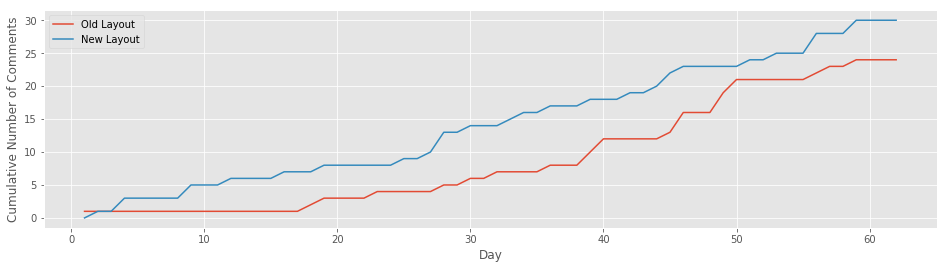

In [195]:
fig, ax = plt.subplots(1, figsize=(16, 4))

x = np.arange(1, 2*31 + 1)
ax.plot(x, cumlative_comments_per_day_old, label="Old Layout")
ax.plot(x, cumlative_comments_per_day_new, label="New Layout")
ax.legend()
ax.set_xlabel("Day")
ax.set_ylabel("Cumulative Number of Comments")

The data we collected makes it look like the new website is **better**.

In [196]:
rate_of_comments_new_layout = np.sum(comments_per_day_new) / float(np.sum(commenters_per_day_new))
rate_of_comments_old_layout = np.sum(comments_per_day_old) / float(np.sum(commenters_per_day_old))

print("Rate of comments, new layout: {:2.2f}".format(rate_of_comments_new_layout))
print("Rate of comments, old layout: {:2.2f}".format(rate_of_comments_old_layout))

Rate of comments, new layout: 0.23
Rate of comments, old layout: 0.19


But our testing framework tells us the truth, we do not reject the null that the new website is not as good as the old.

In [197]:
def two_sample_test_of_population_proportions(commentators_new, comments_new, commentators_old, comments_old):
    difference_in_sample_proportions = (comments_new / float(commentators_new)) - (comments_old / float(commentators_old))
    overall_proportion = (comments_new + comments_old) / float(commentators_new + commentators_old)
    test_varaince = ((comments_new + comments_old) * overall_proportion * (1 - overall_proportion)) / (commentators_new + commentators_old)
    test_distribution = spl.Normal(0, np.sqrt(test_varaince))
    p_value = 1 - test_distribution.cdf(difference_in_sample_proportions)
    return p_value

In [211]:
p_value = two_sample_test_of_population_proportions(
    np.sum(commenters_per_day_new), np.sum(comments_per_day_new), 
    np.sum(commenters_per_day_old), np.sum(comments_per_day_old)
)

print("p-value for full experiment: {:2.2f}".format(p_value))

p-value for full experiment: 0.40


Suppose that we cheated.  We looked at the data every day, and ran a hypothesis test on that days data, stopping if we ever got a significant result.

Now let's see the sequence of p-values we would get if we run the test every day.

In [199]:
cumlative_comments_per_day_old = np.cumsum(comments_per_day_old)
cumlative_comments_per_day_new = np.cumsum(comments_per_day_new)
cumlative_commenters_per_day_old = np.cumsum(commenters_per_day_old)
cumlative_commenters_per_day_new = np.cumsum(commenters_per_day_new)

p_values = [
    two_sample_test_of_population_proportions(
        cumlative_commenters_per_day_new[i], cumlative_comments_per_day_new[i],
        cumlative_commenters_per_day_old[i], cumlative_comments_per_day_old[i]
    )
    for i in range(1, 2*31)
]

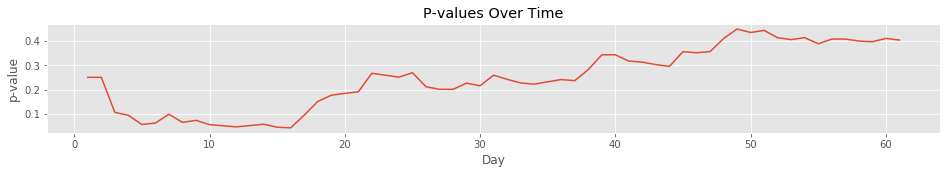

In [210]:
fig, ax = plt.subplots(1, figsize=(16, 2))

ax.plot(range(1, 2*31), p_values)
ax.set_title("P-values Over Time")
ax.set_xlabel("Day")
ax.set_ylabel("p-value")

If we peeked at our data any time between the 10'th and 16'th day, we would have made the wrong conclusion!

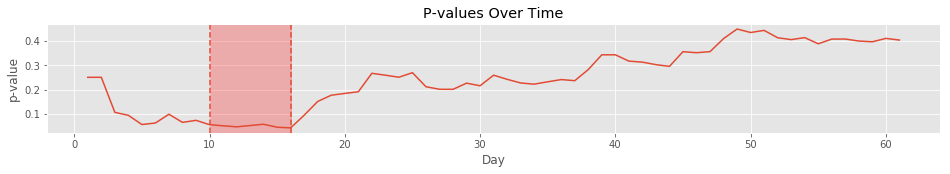

In [209]:
fig, ax = plt.subplots(1, figsize=(16, 2))

ax.plot(range(1, 2*31), p_values)
ax.axvline(10, linestyle="--")
ax.axvline(16, linestyle="--")
ax.axvspan(10, 16, alpha=0.25, color='red')
ax.set_title("P-values Over Time")
ax.set_xlabel("Day")
ax.set_ylabel("p-value")

**Discussion:** What is the danger in testing every day, and stopping the experiment if a signifigant result is found?  Everything seemed to go ok here!

## Chi Squared Tests

### Example: Linear Congruential Generators

You've been contracted to create a small game that will run on an [embedded system](https://en.wikipedia.org/wiki/Embedded_system) (think, for example, a [Tamagotchi](https://en.wikipedia.org/wiki/Tamagotchi).  The system does not have many resources, so you have to create your own random number generator.

After some research, you hit on a lightweight solution, a [linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator).  To scope things out, you code a simple generator in python.

In [44]:
class LinearCongruentialGenerator(object):
    
    def __init__(self, a, c, modulus, seed):
        self._a = a
        self._c = c
        self._modulus = modulus
        self._seed = seed
        
    def next(self):
        next_sample = (self._a * self._seed + self._c) % self._modulus
        self._seed = next_sample
        return next_sample
    
    def sample(self, n):
        L = []
        for _ in xrange(n):
            L.append(lcm.next())
        return np.array(L)

And lookup some parameters to use online.

In [45]:
lcm = LinearCongruentialGenerator(48271, 0, 2**31 - 1, 1)

You want to test if you're code really works, which involves assessing the "randomness" of your generator.  

**Discussion:** How would you assess the quality of your random numbers.

Your intention in the app is to use the generator to create random six sided dice rolls, so you plan to test whether the generator is appropriate for that application.

You have a strong belief that the die is fair, as this code is based on an industry standard method, so your goal here is to detect whether the random number generator is *unfair.*

The app will only be used in small bursts of activity, so you decide to run these tests on a smallish sample.

<Container object of 6 artists>

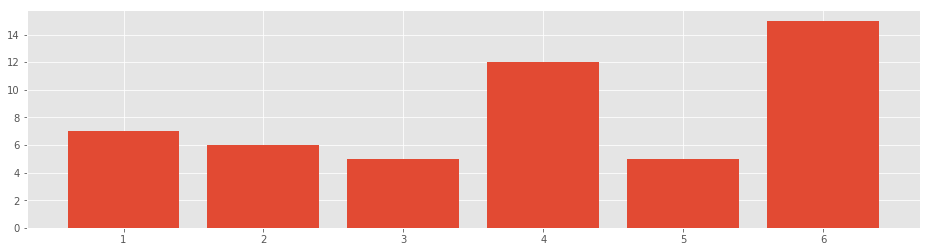

In [46]:
dice_rolls = lcm.sample(50) % 6
dice_freqs = np.bincount(dice_rolls)

fig, ax = plt.subplots(1, figsize=(16, 4))
ax.bar(range(1, 7), dice_freqs, align='center')

### The Chi-Squared Test for Distribution

The first step is to arrange our results into a **contingency table**, which compares the expected frequency to the observed frequency

In [47]:
import pandas as pd
dice_rolls_contingency_table = pd.DataFrame(
    {'expected': np.repeat(8.3, 6) , 'actual': dice_freqs}
)
print(dice_rolls_contingency_table)

   actual  expected
0       7       8.3
1       6       8.3
2       5       8.3
3      12       8.3
4       5       8.3
5      15       8.3


The **Chi Squared Test for Distribution**, (also known as the **Chi Squared Test for Goodness of Fit** tests the hypothesis that the **actual** data was not generated from a discrete distributition which has expected frequencies as calcualted.

>$H_0$: The data was generated from a dicrete distribution with the given expected frequencies.

> $H_{a}$: The data was *not* generated from a discrete distribution with the given expected frequencies.

In out situation, a shorter way to express this is

>$H_0$: The data generated from the random number generator is consistent with a fair die.

> $H_{a}$: The data generated from the random number generator is not consistent with a fair die.

**Note** a point of awkwardness here.  We would like to conclude the die is fair, so really our antagonistic hypothesis should be that the die is unfair.  But assuming the die is unfair does not let us create a probabilistic model for the situation under the null.

Unforunately, this is the common logic of Chi squared tests for distribution.

#### Assemble the Contingency Table

We've already done this step.  Good to go.

#### Compute the Test Statistic

The first step in the Chi Squared test is to compute the following test statistic:

$$ T = \sum_i \frac{(O_i - E_i)^2}{E_i} $$

In [48]:
def chi_squared_test_statistic(observeds, expecteds):
    numerators = (observeds - expecteds)**2
    ratios = numerators / expecteds
    return np.sum(ratios)

The logic of the Chi Squared test is that this quantity follows a certain distribution, the chi squared distribution.

#### Preform the Test

The Chi Squared distribution has one parameter, the degrees of freedom.

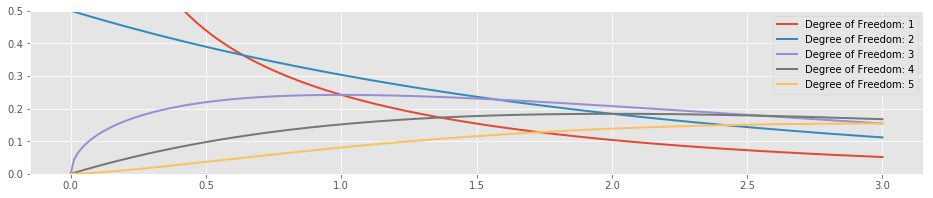

In [49]:
dfs = [1, 2, 3, 4, 5]
x = np.linspace(0, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))

for df in dfs:
    chisq = spl.ChiSquared(df)
    ax.plot(x, chisq.pdf(x), linewidth=2,
            label="Degree of Freedom: {}".format(df))
ax.set_ylim(0, 0.5)
ax.legend()

The Chi squared test provides the degrees of freedom as:
    
$$ \text{Number of Cells in the Contingency Table} - \text{Number of Parameters in Distribution} + 1$$

So let's apply this to our contingency tables

#### The Dice Rolls

In this case, our degrees of freedom for the Chi Squared distribution is

$$ 6 - 1 + 1 = 6 $$

And the test statistic is

In [50]:
T = chi_squared_test_statistic(dice_rolls_contingency_table.actual, 
                               dice_rolls_contingency_table.expected)

So our p-value for the test is

In [51]:
test_distribution = spl.ChiSquared(6)
p_value = 1 - test_distribution.cdf(T)
print("p-value for dice rolls: {:2.2f}".format(p_value))

p-value for dice rolls: 0.10


Looks like this experiment does *not* give us enough evidence to conclude that our random number generator produces fair rolls.  Looks like we should do more research.

**Exercise:** Do the other test, of consecutive differences.

## Secret Coode to Find Random Seed that Rejects

In [181]:
def reject_on_day(seed, burn_in=0):
    np.random.seed(seed)

    old_forum_comment_rate = 0.2
    new_forum_comment_rate = 0.18
    commenters_per_day = spl.Poisson(2)

    commenters_per_day_old = commenters_per_day.sample(2*31)
    commenters_per_day_new = commenters_per_day.sample(2*31)

    comments_per_day_old = [spl.Binomial(commenters, old_forum_comment_rate).sample(1)
                                  for commenters in commenters_per_day_old]
    comments_per_day_new = [spl.Binomial(commenters, new_forum_comment_rate).sample(1)
                                  for commenters in commenters_per_day_new]

    cumlative_comments_per_day_old = np.cumsum(comments_per_day_old)
    cumlative_comments_per_day_new = np.cumsum(comments_per_day_new)
    
    cumlative_comments_per_day_old = np.cumsum(comments_per_day_old)

    cumlative_comments_per_day_new = np.cumsum(comments_per_day_new)
    cumlative_commenters_per_day_old = np.cumsum(commenters_per_day_old)
    cumlative_commenters_per_day_new = np.cumsum(commenters_per_day_new)

    p_values = np.array([
        two_sample_test_of_population_proportions(
            cumlative_commenters_per_day_new[i], cumlative_comments_per_day_new[i],
            cumlative_commenters_per_day_old[i], cumlative_comments_per_day_old[i]
        )
        for i in range(1, 2*31)
    ])
    
    return any(p_values[burn_in:] <= 0.05)

In [182]:
for seed in range(1, 50000):
    if reject_on_day(seed, burn_in=15):
        break

/Users/matthew.drury/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


In [183]:
seed

132